In [32]:
# This code return a net file of a Cyprus LV Network
%run 2.Strovolides_Network.ipynb
# pp.runpp_3ph(net)

c:\Users\savva\AppData\Local\anaconda3\Lib\site-packages\pandapower\create.py:4964: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Dyn' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  net[element_type].at[index, column] = value


In [33]:
# All the functions that used in modeling
%run 3.Modeling_Functions.ipynb

In [34]:
# Load the data see for example the following 
%run 4.Load_Data.ipynb
# print(PV_profile) # Profile per month with time-interval 30 minutes.
# print(load_profile) # Load profile of 342 customers with time-interval 30 minutes load_profile[customer][day].
# plt.plot(sum(load_profile[i,185] for i in range(90)))
# print(Strovolides_Loads_Measurement) # Actual measurements of strovolides load in July.
# print(PV_Data) # Historical PV data of Limassol PV installations
### ... for more see the ipynb
# truncated_normal_departure # Truncated_t_student distribution for departure time
# probabilities_weekends # Probability for distance trip in weekends
# probabilities_weekdays #Probability for distance trip in Weekdays
# probabilities_one_phase # Probability for PV power in signle phase
# probabilities_three_phase # Probability for PV power in three phase

C:\Users\savva\AppData\Local\Temp\ipykernel_17672\980404390.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Strovolides_Loads_Measurement.index = pd.to_datetime(Strovolides_Loads_Measurement.index)


In [35]:
# # load_profile_cyprus = load_profile_cyprus[:,180:191,:]
# Feeder1Loads = assign_phase_type(df=net.asymmetric_load,three_phase_percentage=0.5, PV_percentage=0.4, EV_percentage=0, Total_loads_of_feeder=30,feeder='F1',values_one_phase=values_one_phase,probabilities_one_phase=probabilities_one_phase,values_three_phase=values_three_phase,probabilities_three_phase=probabilities_three_phase)
# print(Feeder1Loads)
# F1_Basic_Load = Basic_Load_profile(Feeder1Loads,0,load_profile_cyprus)
# print(F1_Basic_Load)
# plt.plot(F1_Basic_Load.sum(axis=1).values)
# F1_EV_load = EV_load_profile(Feeder1Loads,0,truncated_normal_arrival,truncated_normal_departure)
# print(F1_EV_load)


In [43]:
monte_carlo_total_results = {}

power_factor      = 0.9
theta = math.acos(power_factor)
tan_t = math.tan(theta)

# Give Month Name that you want to simulate
month_name = "July"

# Give type of day [weekday = 0], [Weekend = 1]
Type_of_Day = 0

three_phase_perc = 0.8
PV_perc_levels = [0.2,0.4]
loads_per_feeder=30
loss_coefficient = 0.11
EV_penetration_levels = [0]
for PV_perc in PV_perc_levels:
    pv_perc_title = f"monte_carlo_results_pv_{PV_perc}"
    monte_carlo_ev_results = {}
    for EV_perc in EV_penetration_levels:
        ev_perc_title = f"monte_carlo_results_ev_{EV_perc}"
        monte_carlo_results = {}
        for day in range(0, 5):  # Simulating for 3 days
            results_day  = quasi_sim(net,load_profile, PV_profile, month_name, Type_of_Day, Strovolides_Loads_Measurement,tan_t,three_phase_perc,PV_perc,EV_perc,loads_per_feeder,loss_coefficient,PV_Proba,q_profile)
            monte_carlo_results[f'day_{day}'] = results_day
        monte_carlo_ev_results[ev_perc_title] = monte_carlo_results
    monte_carlo_total_results[pv_perc_title] = monte_carlo_ev_results

In [33]:
# power_factor      = 0.9
# theta = math.acos(power_factor)
# tan_t = math.tan(theta)
# results_day  = quasi_sim(net,load_profile, PV_profile, "July", 0, Strovolides_Loads_Measurement,tan_t,0.5,0.2,0,30,0.11,PV_Proba,q_profile)

In [ ]:
# #Some First Run Results for testing propose of plotting functions
# import pickle

# # Save to a .pkl file
# with open('monte_carlo.pkl', 'wb') as file:
#     pickle.dump(monte_carlo_total_results, file)


In [4]:
#Some First Run Results for testing propose of plotting functions
import pickle

# Load from the .pkl file
with open('Results/3rd_Try/monte_carlo.pkl', 'rb') as file:  # 'rb' stands for read binary
    monte_carlo_total_results = pickle.load(file)

In [44]:
%run 5.Plot_Functions.ipynb

  Median: 0.979
  Lower box-plot: 0.972
  Upper box-plot: 0.983
  Lower Whisker: 0.959
  Upper Whisker: 0.994
  Median: 0.978
  Lower box-plot: 0.974
  Upper box-plot: 0.983
  Lower Whisker: 0.962
  Upper Whisker: 0.992
  Median: 0.978
  Lower box-plot: 0.973
  Upper box-plot: 0.983
  Lower Whisker: 0.960
  Upper Whisker: 0.993


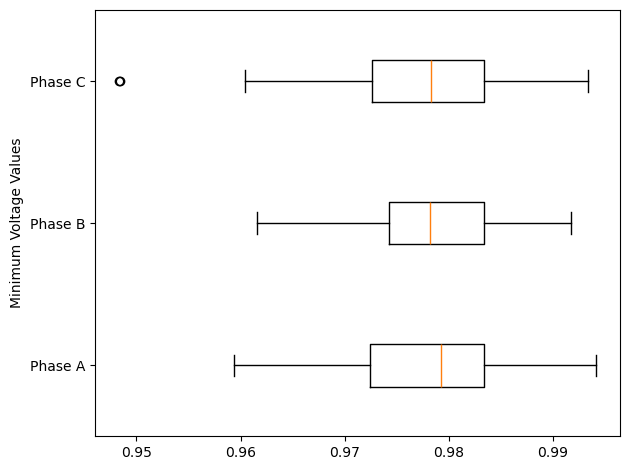

In [48]:
######################## Plot Voltage Results for a certain PV penetration ##########################################################
three_phase_minv_bp(monte_carlo_total_results['monte_carlo_results_pv_0.4']['monte_carlo_results_ev_0'],'Without EVs and 20% PVs')
# three_phase_minv_bp(monte_carlo_total_results['monte_carlo_results_pv_0.4']['monte_carlo_results_ev_0'],'Without EVs and 40% PVs')
# three_phase_minv_bp(monte_carlo_total_results['monte_carlo_results_pv_0.6']['monte_carlo_results_ev_0'],'Without EVs and 60% PVs')
# three_phase_minv_bp(monte_carlo_total_results['monte_carlo_results_pv_0.8']['monte_carlo_results_ev_0'],'Without EVs and 80% PVs')

In [ ]:
################ THIS CODE IS NOT TRUE, THEREFORE NOT NEEDED I HAVE KEEP IT HERE BECAUSE OF THE PLOTTING METHODOLOGY ##########

######################## Plot Average Voltage Results for a all PV and EV penetration simulations ##########################################################
# three_phase_minv_bp_2(monte_carlo_total_results,'Average Voltage Deviation')

  Median: 0.977
  Lower box-plot: 0.973
  Upper box-plot: 0.983
  Lower Whisker: 0.961
  Upper Whisker: 0.990
  Median: 0.980
  Lower box-plot: 0.974
  Upper box-plot: 0.985
  Lower Whisker: 0.970
  Upper Whisker: 0.994


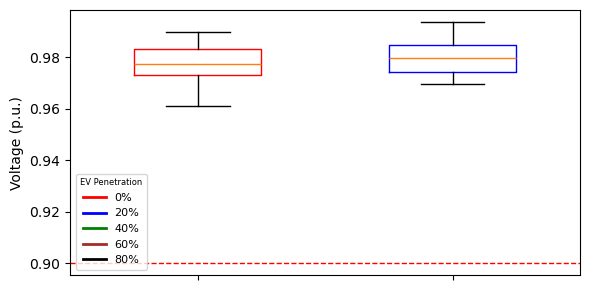

In [53]:
%run 5.Plot_Functions.ipynb

min_voltage_bp3(monte_carlo_total_results,'Minimum Voltage')

  Median: 34.148
  Average: 34.256
  Lower box-plot: 28.312
  Upper box-plot: 43.024
  Lower Whisker: 11.181
  Upper Whisker: 57.150


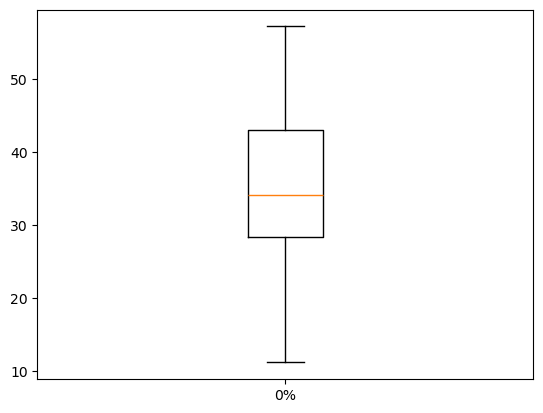

In [ ]:
%run 5.Plot_Functions.ipynb

EV_penetration_levels = [0,0.2,0.4,0.6,0.8]
######################## Plot Transformer Results for a certain PV penetration ##########################################################
# transformer_loading_bp(monte_carlo_total_results['monte_carlo_results_pv_0.2'],EV_penetration_levels,'Transformer loading 2')
transformer_loading_bp(monte_carlo_total_results['monte_carlo_results_pv_0.4'],EV_penetration_levels,'Transformer loading 2')


  Median: 37.94
  Mean: 36.83
  Lower box-plot: 26.79
  Upper box-plot: 47.23
  Lower Whisker: 15.90
  Upper Whisker: 58.45
  Median: 34.15
  Mean: 34.26
  Lower box-plot: 28.31
  Upper box-plot: 43.02
  Lower Whisker: 11.18
  Upper Whisker: 57.15


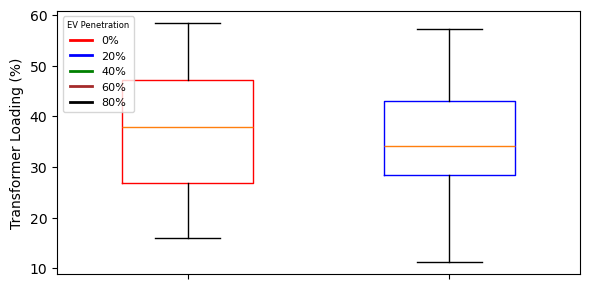

In [59]:

######################## Plot Max Phase Transformer loading Results for a all PV and EV penetration simulations ##########################################################
transformer_loading_bp2(monte_carlo_total_results,'Transformer loading')

  Median: 51.23
  Mean: 52.35
  Lower box-plot: 50.61
  Upper box-plot: 51.24
  Lower Whisker: 50.20
  Upper Whisker: 51.24
  Median: 51.09
  Mean: 51.84
  Lower box-plot: 49.15
  Upper box-plot: 53.95
  Lower Whisker: 47.83
  Upper Whisker: 57.15


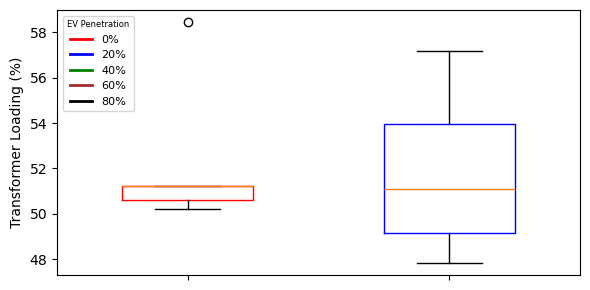

In [60]:
%run 5.Plot_Functions.ipynb
max_transformer_loading_bp2(monte_carlo_total_results,'Max_Transformer loading')

  Median: 17.925
  Lower box-plot: 13.620
  Upper box-plot: 22.256
  Lower Whisker: 7.203
  Upper Whisker: 34.686
  Median: 16.259
  Lower box-plot: 12.566
  Upper box-plot: 20.554
  Lower Whisker: 4.296
  Upper Whisker: 31.439


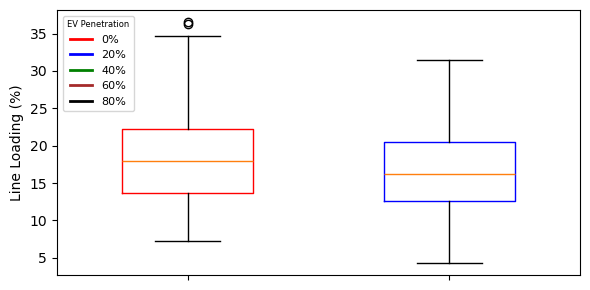

In [61]:
%run 5.Plot_Functions.ipynb
######################## Plot Max Phase line loading Results for a all PV and EV penetration simulations ##########################################################
line_loading_bp2(monte_carlo_total_results,'Line loading')

  Median: 26.536
  Lower box-plot: 23.515
  Upper box-plot: 34.686
  Lower Whisker: 22.937
  Upper Whisker: 36.540
  Median: 25.724
  Lower box-plot: 24.819
  Upper box-plot: 27.146
  Lower Whisker: 24.290
  Upper Whisker: 27.146


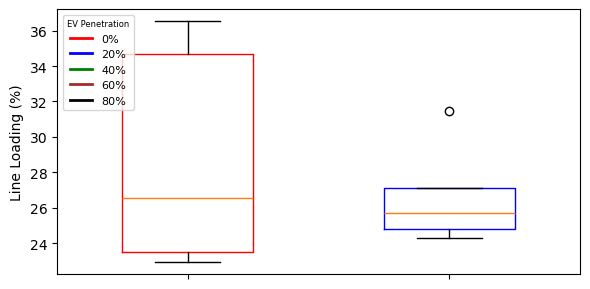

In [62]:
%run 5.Plot_Functions.ipynb
######################## Plot Max Phase line loading Results for a all PV and EV penetration simulations ##########################################################
max_line_loading_bp2(monte_carlo_total_results,'Max Line loading')

  Median: 0.767
  Lower box-plot: 0.424
  Upper box-plot: 1.746
  Lower Whisker: 0.140
  Upper Whisker: 3.676
  Median: 0.573
  Lower box-plot: 0.394
  Upper box-plot: 0.857
  Lower Whisker: 0.141
  Upper Whisker: 1.534


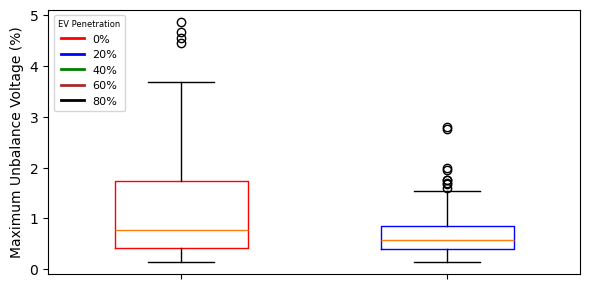

In [63]:
max_unbalance_voltage_bp2(monte_carlo_total_results,'Voltage Unbalance')

  Median: 44.182
  Lower box-plot: 43.165
  Upper box-plot: 44.293
  Lower Whisker: 43.030
  Upper Whisker: 44.293
  Median: 40.641
  Lower box-plot: 40.385
  Upper box-plot: 42.195
  Lower Whisker: 40.022
  Upper Whisker: 42.195
  Median: 40.899
  Lower box-plot: 40.867
  Upper box-plot: 41.748
  Lower Whisker: 40.479
  Upper Whisker: 41.748
  Median: 38.644
  Lower box-plot: 38.008
  Upper box-plot: 38.739
  Lower Whisker: 37.972
  Upper Whisker: 38.739
  Median: 37.901
  Lower box-plot: 37.436
  Upper box-plot: 38.840
  Lower Whisker: 35.623
  Upper Whisker: 38.840
  Median: 36.706
  Lower box-plot: 34.759
  Upper box-plot: 36.766
  Lower Whisker: 34.163
  Upper Whisker: 36.766
  Median: 35.249
  Lower box-plot: 34.990
  Upper box-plot: 35.918
  Lower Whisker: 34.990
  Upper Whisker: 35.918
  Median: 37.273
  Lower box-plot: 35.595
  Upper box-plot: 42.156
  Lower Whisker: 34.300
  Upper Whisker: 46.366
  Median: 35.309
  Lower box-plot: 33.573
  Upper box-plot: 43.323
  Lower Whisk

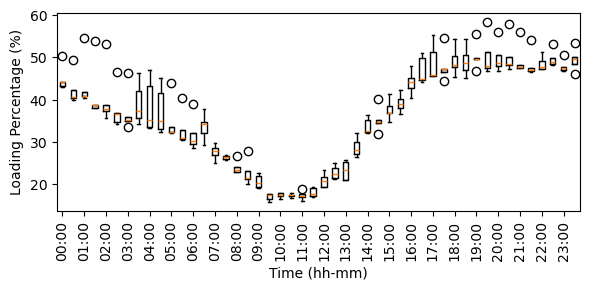

In [65]:
%run 5.Plot_Functions.ipynb
######################## Plot time interval transformer loading Results for a certain PV and EV penetration ##########################################################
transformer_loading_time_interval_boxplot(monte_carlo_total_results['monte_carlo_results_pv_0.2']['monte_carlo_results_ev_0'],'Transformer Loading Without EV')


  Median: 0.000
  Lower box-plot: 0.000
  Upper box-plot: 0.000
  Lower Whisker: 0.000
  Upper Whisker: 0.000
  Median: 0.000
  Lower box-plot: 0.000
  Upper box-plot: 0.000
  Lower Whisker: 0.000
  Upper Whisker: 0.000
  Median: 0.000
  Lower box-plot: 0.000
  Upper box-plot: 0.000
  Lower Whisker: 0.000
  Upper Whisker: 0.000
  Median: 0.000
  Lower box-plot: 0.000
  Upper box-plot: 0.000
  Lower Whisker: 0.000
  Upper Whisker: 0.000
  Median: 0.000
  Lower box-plot: 0.000
  Upper box-plot: 0.000
  Lower Whisker: 0.000
  Upper Whisker: 0.000
  Median: 0.000
  Lower box-plot: 0.000
  Upper box-plot: 0.000
  Lower Whisker: 0.000
  Upper Whisker: 0.000
  Median: 0.000
  Lower box-plot: 0.000
  Upper box-plot: 0.000
  Lower Whisker: 0.000
  Upper Whisker: 0.000
  Median: 0.000
  Lower box-plot: 0.000
  Upper box-plot: 0.000
  Lower Whisker: 0.000
  Upper Whisker: 0.000
  Median: 0.000
  Lower box-plot: 0.000
  Upper box-plot: 0.000
  Lower Whisker: 0.000
  Upper Whisker: 0.000
  Median: 

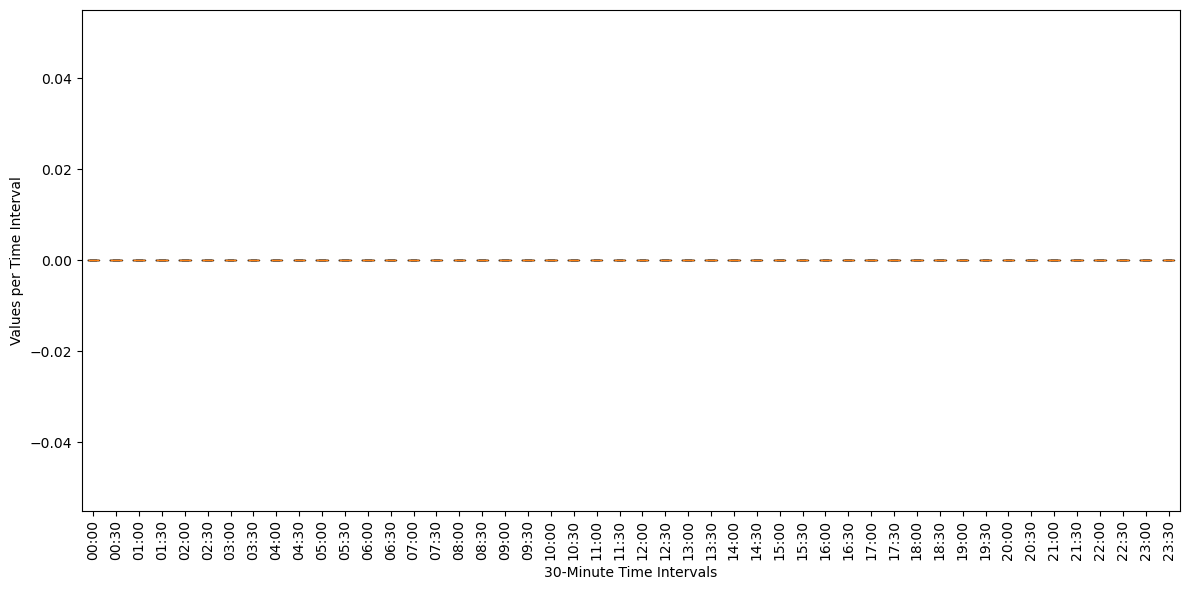

In [66]:
######################## Plot time interval EV loading profile  for a certain PV and EV penetration ##########################################################
ev_loading_time_interval_boxplot(monte_carlo_total_results['monte_carlo_results_pv_0.2']['monte_carlo_results_ev_0'],'Without EV')

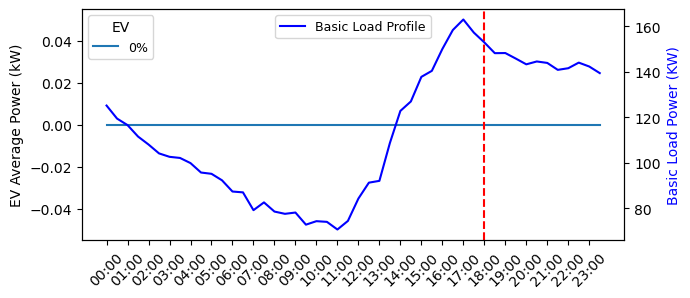

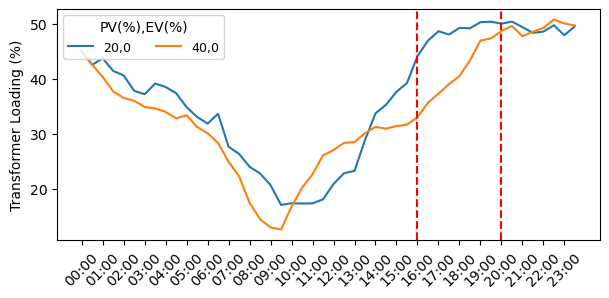

In [67]:
%run 5.Plot_Functions.ipynb
mean_ev_and_trans_loading_time_interval_lineplot(monte_carlo_total_results,Strovolides_Loads_Measurement['P_Sum'],'Average EV Profile and Transformer Loading')

In [69]:
groups,groupF1,groupF2,groupF3 = group_buses_results_by_distance(net)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


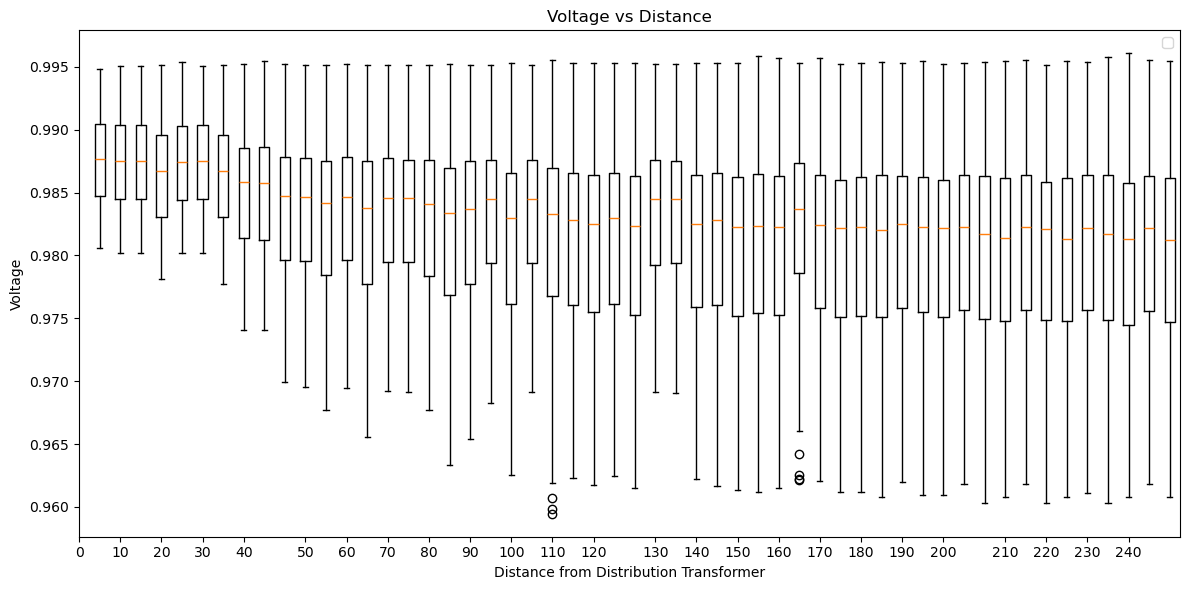

In [71]:
distance_voltage_bp(monte_carlo_total_results['monte_carlo_results_pv_0.4']['monte_carlo_results_ev_0'],'Voltage vs Distance',groupF3)

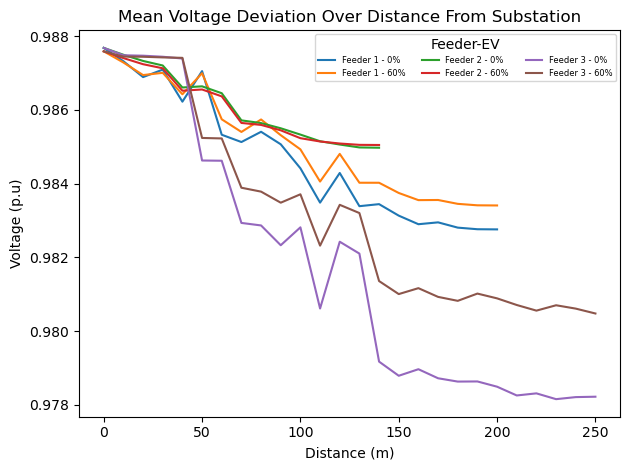

In [73]:
%run 5.Plot_Functions.ipynb
distance_voltage_lineplot(([monte_carlo_total_results['monte_carlo_results_pv_0.2']['monte_carlo_results_ev_0'],monte_carlo_total_results['monte_carlo_results_pv_0.4']['monte_carlo_results_ev_0']]),'Mean Voltage Deviation Over Distance From Substation',[groupF1,groupF2,groupF3])